## Install Required Libraries

In [1]:
!pip install sktime --quiet
!pip install pyts --quiet
!pip install git+https://github.com/gon-uri/detach_rocket --quiet

## Download Dataset from UEA

In [2]:
# Download Dataset
from detach_rocket.utils_datasets import fetch_uea_dataset

dataset_name_list = ['SelfRegulationSCP1'] 
current_dataset = fetch_uea_dataset(dataset_name_list[0])

## Prepare Dataset Matrices

In [3]:
print(f"Dataset Matrix Shape: ( # of instances , # of channels , time series length )")
print(f" ")

# Train Matrix
X_train = current_dataset['data_train']
print(f"Train: {X_train.shape}")
y_train = current_dataset['target_train']

print(f" ")

# Test Matrix
X_test = current_dataset['data_test']
print(f"Test: {X_test.shape}")
y_test = current_dataset['target_test']

Dataset Matrix Shape: ( # of instances , # of channels , time series length )
 
Train: (268, 6, 896)
 
Test: (293, 6, 896)


## Train and Evaluate the Model

In [4]:
from detach_rocket.detach_classes import DetachEnsemble
from sklearn.metrics import accuracy_score

# Select initial model characteristics
num_models = 5
num_kernels = 1000

# Create model object
DetachEnsembleModel = DetachEnsemble(num_models=num_models, num_kernels=num_kernels)

# Train Model
DetachEnsembleModel.fit(X_train, y_train)

# Evaluate Performance on Train set
y_train_pred = DetachEnsembleModel.predict(X_train)
print('Train Accuracy: {:.2f}%'.format(100*accuracy_score(y_train, y_train_pred)))

y_test_pred = DetachEnsembleModel.predict(X_test)
print('Test Accuracy: {:.2f}%'.format(100*accuracy_score(y_test, y_test_pred)))

TRAINING RESULTS Full ROCKET:
Optimal Alpha Full ROCKET: 428.13
Train Accuraccy Full ROCKET: 98.51%
-------------------------
TRAINING RESULTS Detach Model:
Optimal Alpha Detach Model: 37.93
Train Accuraccy Detach Model: 95.15%
-------------------------
TRAINING RESULTS Full ROCKET:
Optimal Alpha Full ROCKET: 428.13
Train Accuraccy Full ROCKET: 98.88%
-------------------------
TRAINING RESULTS Detach Model:
Optimal Alpha Detach Model: 37.93
Train Accuraccy Detach Model: 98.88%
-------------------------
TRAINING RESULTS Full ROCKET:
Optimal Alpha Full ROCKET: 428.13
Train Accuraccy Full ROCKET: 98.13%
-------------------------
TRAINING RESULTS Detach Model:
Optimal Alpha Detach Model: 37.93
Train Accuraccy Detach Model: 94.78%
-------------------------
TRAINING RESULTS Full ROCKET:
Optimal Alpha Full ROCKET: 428.13
Train Accuraccy Full ROCKET: 98.51%
-------------------------
TRAINING RESULTS Detach Model:
Optimal Alpha Detach Model: 37.93
Train Accuraccy Detach Model: 94.03%
----------

## Estimate and plot channel relevance

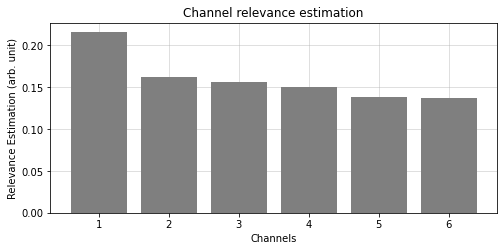

In [5]:
import matplotlib.pyplot as plt

x = range(1, DetachEnsembleModel.num_channels + 1)
channel_relevance = DetachEnsembleModel.estimate_channel_relevance()

plt.figure(figsize=(8,3.5))
plt.bar(x, channel_relevance, color='C7', zorder=2)

plt.title('Channel relevance estimation')
plt.grid(True, linestyle='-', alpha=0.5, zorder=1)
plt.xlabel('Channels')
plt.ylabel('Relevance Estimation (arb. unit)')
plt.show()